C:\Users\Darkm\AppData\Local\Temp\ipykernel_6984\1234914053.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Rating'] = pd.to_numeric(df_selected['Rating'], errors='coerce')


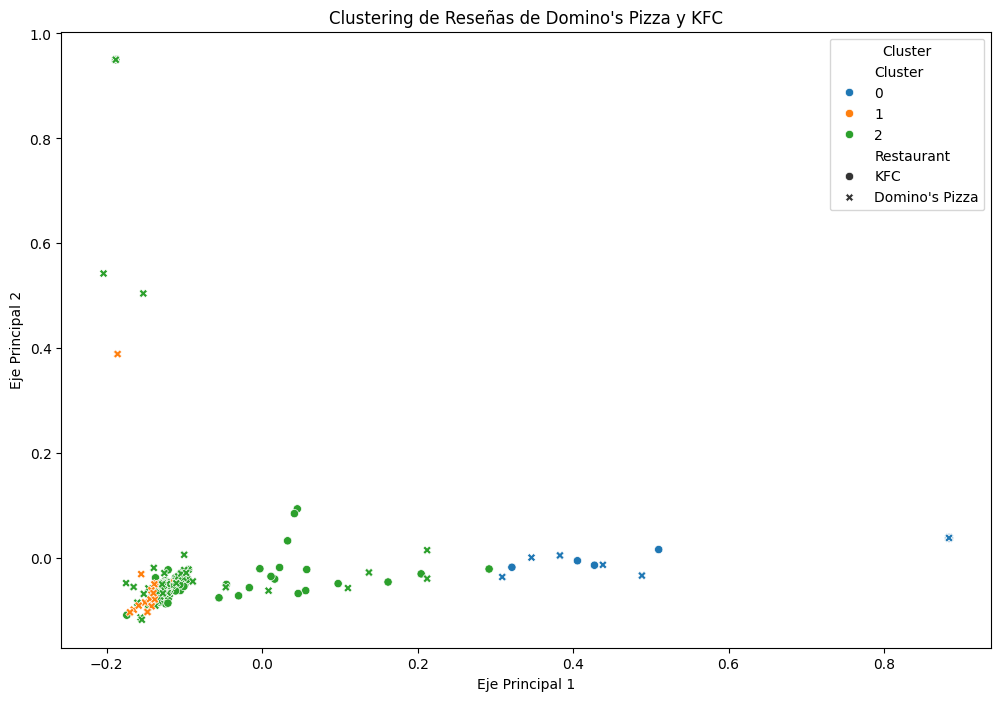

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('Restaurant Scrapped Clean.csv')

# Filtrar el dataframe para incluir solo las reseñas de los dos restaurantes seleccionados
selected_restaurants = ["Domino's Pizza", 'KFC']
df_selected = df[df['Restaurant'].isin(selected_restaurants)]

# Convertir la columna 'Rating' a enteros
df_selected['Rating'] = pd.to_numeric(df_selected['Rating'], errors='coerce')

# Eliminar filas con valores nulos en 'Rating' o 'Review'
df_selected = df_selected.dropna(subset=['Rating', 'Review'])

# Preprocesamiento del texto
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df_selected['Review'])

# Aplicar K-Means clustering
num_clusters = 3  # Puedes ajustar el número de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(X)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Agregar las componentes PCA al dataframe
df_selected['Componente 1'] = X_pca[:, 0]
df_selected['Componente 2'] = X_pca[:, 1]

# Función para graficar los clusters
def plot_clusters(df):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', style='Restaurant', data=df, palette='tab10')
    plt.title('Clustering de Reseñas de Domino\'s Pizza y KFC')
    plt.xlabel('Eje Principal 1')
    plt.ylabel('Eje Principal 2')
    plt.legend(title='Cluster')
    plt.show()

# Generar el scatter plot
plot_clusters(df_selected)
